Dataset Overview:
Dataset shape: (301, 9)

First few rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null   

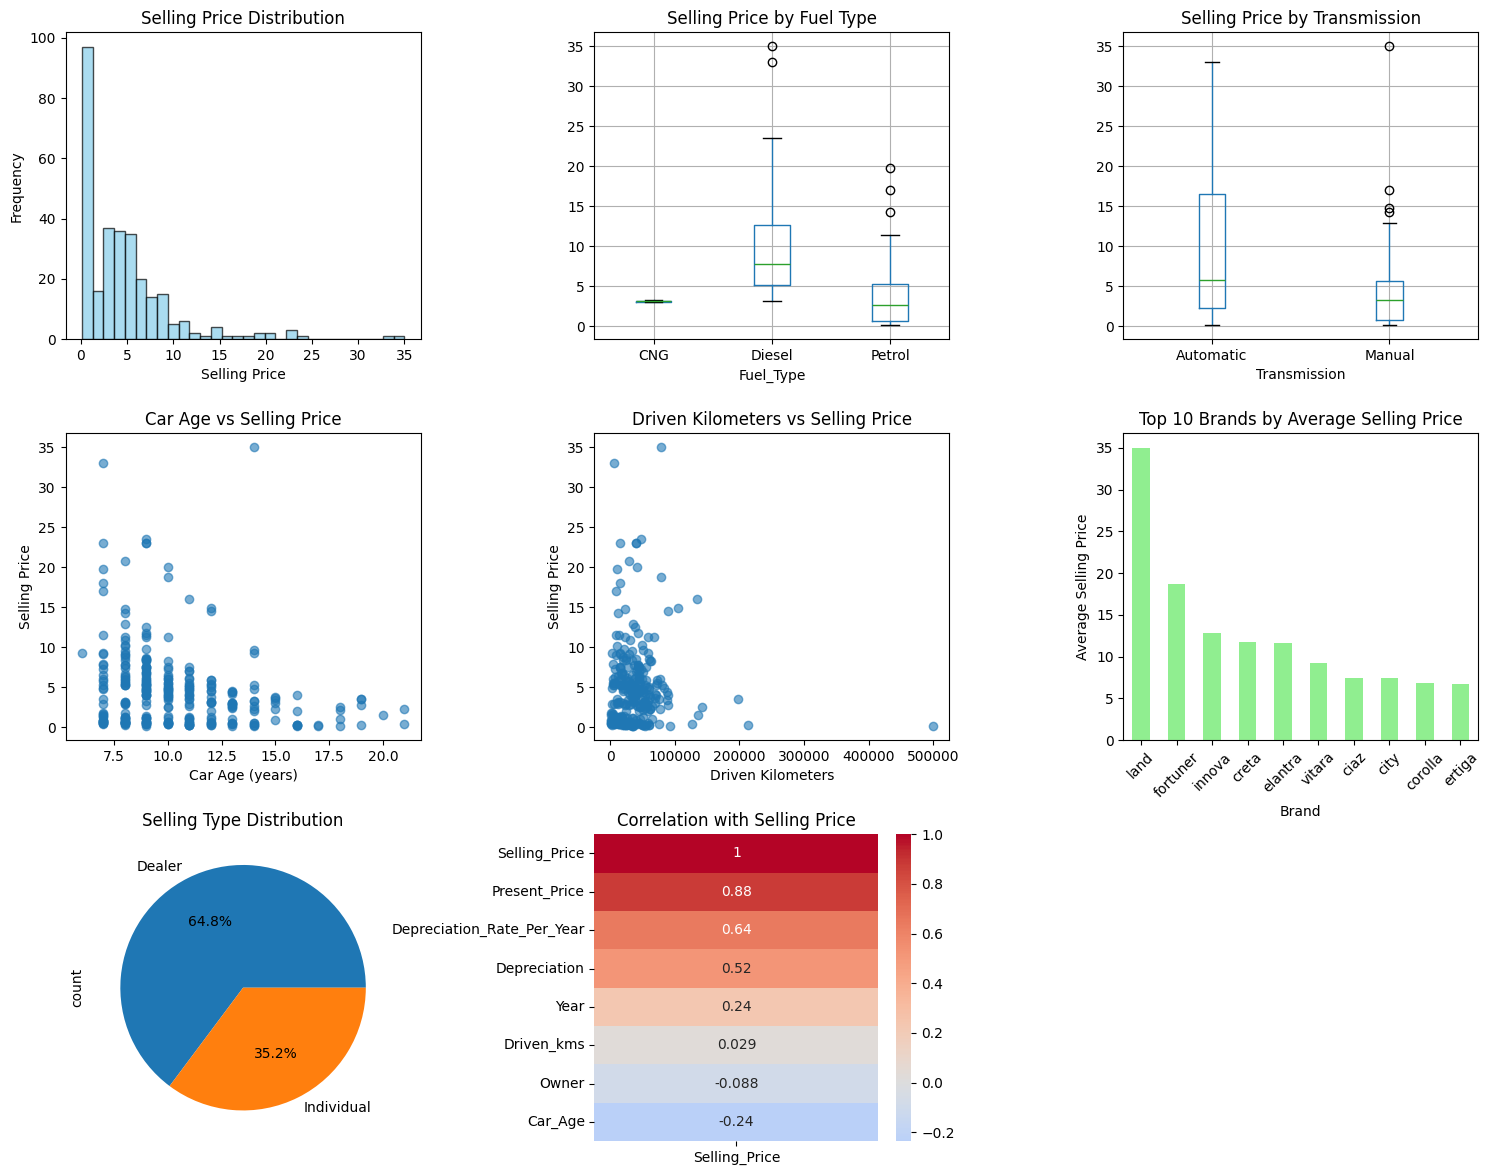


DATA PREPARATION FOR MODELING
Feature shapes:
X shape: (301, 9)
y shape: (301,)

Performing feature selection...
Feature Importance Scores:
         Feature        Score       P-value
1  Present_Price  1015.231064  3.897536e-98
4   Selling_type   130.164012  2.852420e-25
3      Fuel_Type   104.812250  2.764462e-21
8          Brand    81.300123  2.385286e-17
5   Transmission    46.577926  4.901447e-11
0           Year    17.657642  3.495472e-05
7        Car_Age    17.657642  3.495472e-05
6          Owner     2.351956  1.261834e-01
2     Driven_kms     0.254931  6.139960e-01

Training set size: 240
Test set size: 61

MODEL TRAINING

Training Random Forest...
Random Forest Performance:
  MAE: 0.5800
  MSE: 0.7652
  RMSE: 0.8747
  R²: 0.9668

Training Linear Regression...
Linear Regression Performance:
  MAE: 1.2265
  MSE: 3.5248
  RMSE: 1.8775
  R²: 0.8470

MODEL EVALUATION

Model Comparison:
                        MAE      RMSE        R2
Random Forest      0.580043   0.87473  0.966784


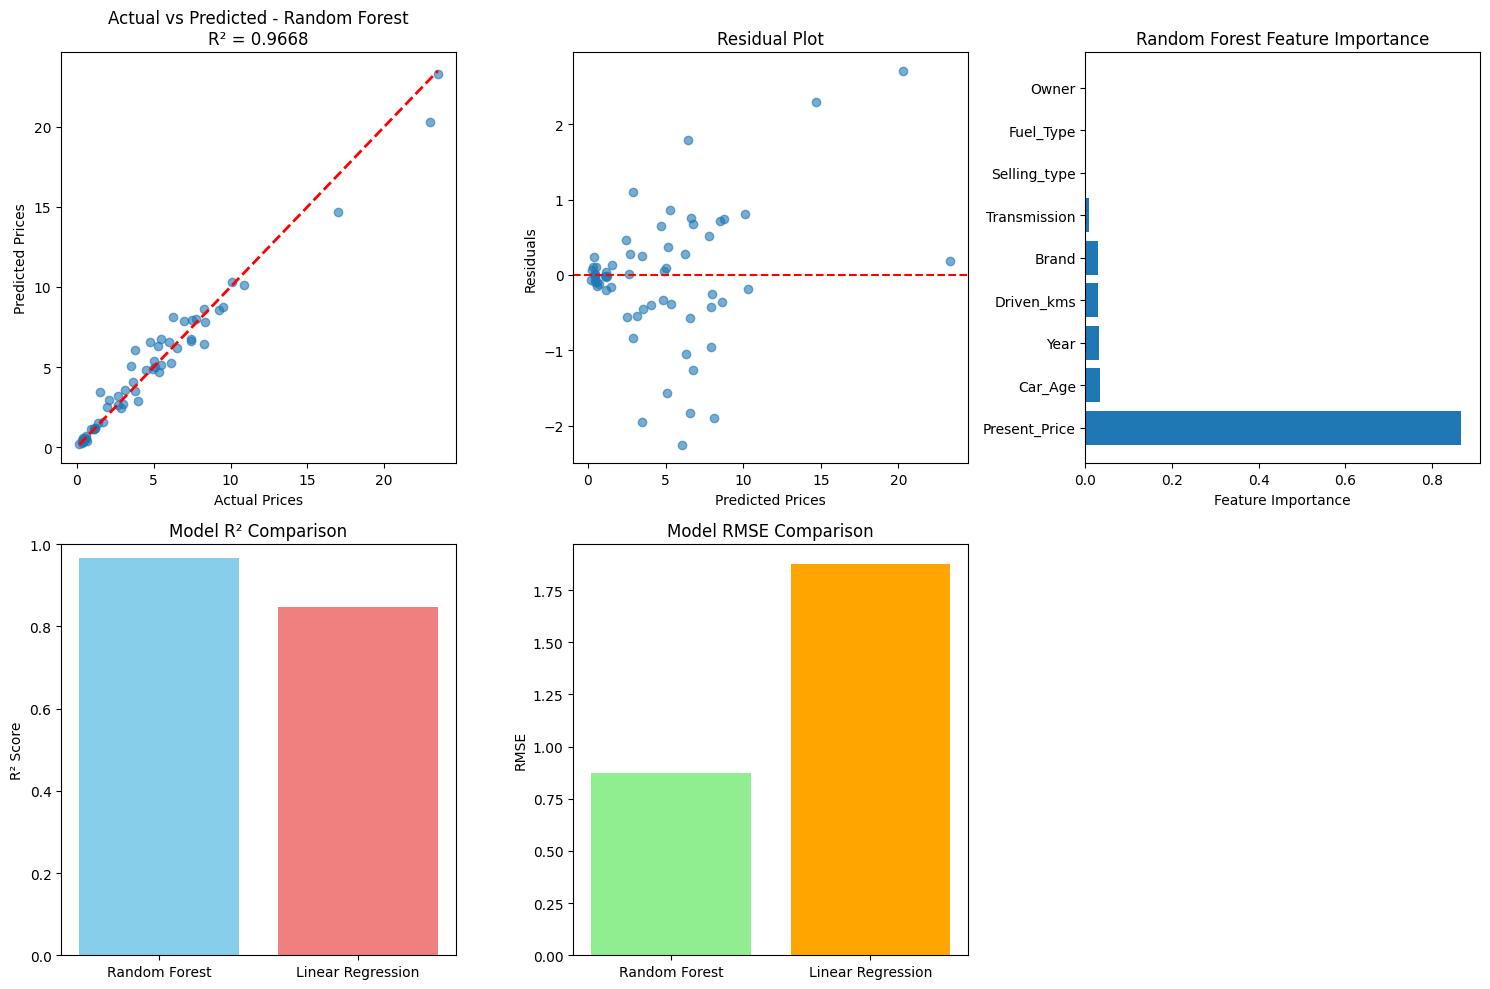


REAL-WORLD APPLICATION

Price Prediction for New Cars:

Price Predictions:
Car 1:
  Year: 2020.0, Brand: city
  Driven: 25000.0 km, Fuel: Petrol
  Predicted Selling Price: ₹7.10 Lakhs

Car 2:
  Year: 2018.0, Brand: creta
  Driven: 45000.0 km, Fuel: Diesel
  Predicted Selling Price: ₹9.82 Lakhs


SUMMARY AND INSIGHTS

Best Performing Model: Random Forest
R² Score: 0.9668
RMSE: 0.8747

Key Insights:
1. The model can predict car prices with reasonable accuracy
2. Present price, car age, and driven kilometers are key factors
3. Brand reputation significantly affects resale value
4. Fuel type and transmission influence pricing decisions

Real-world Applications:
✓ Used car valuation for buyers and sellers
✓ Insurance companies for premium calculation
✓ Banks for loan valuation
✓ Car dealerships for inventory pricing
✓ Market analysis and trend prediction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r"C:\Users\Dell\Desktop\car data.csv")

print("Dataset Overview:")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)


df = df.dropna()


print("\nCreating new features...")


df['Brand'] = df['Car_Name'].str.split().str[0]


current_year = 2024
df['Car_Age'] = current_year - df['Year']


df['Depreciation'] = df['Present_Price'] - df['Selling_Price']


df['Depreciation_Rate_Per_Year'] = df['Depreciation'] / df['Car_Age']
df['Depreciation_Rate_Per_Year'] = df['Depreciation_Rate_Per_Year'].replace([np.inf, -np.inf], 0).fillna(0)


df['Mileage_Category'] = pd.cut(df['Driven_kms'], 
                               bins=[0, 10000, 50000, 100000, float('inf')],
                               labels=['Very Low', 'Low', 'Medium', 'High'])

print("New features created:")
print(df[['Brand', 'Car_Age', 'Depreciation', 'Depreciation_Rate_Per_Year', 'Mileage_Category']].head())


print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

plt.figure(figsize=(15, 12))


plt.subplot(3, 3, 1)
plt.hist(df['Selling_Price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')


plt.subplot(3, 3, 2)
df.boxplot(column='Selling_Price', by='Fuel_Type', ax=plt.gca())
plt.title('Selling Price by Fuel Type')
plt.suptitle('')


plt.subplot(3, 3, 3)
df.boxplot(column='Selling_Price', by='Transmission', ax=plt.gca())
plt.title('Selling Price by Transmission')
plt.suptitle('')


plt.subplot(3, 3, 4)
plt.scatter(df['Car_Age'], df['Selling_Price'], alpha=0.6)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')


plt.subplot(3, 3, 5)
plt.scatter(df['Driven_kms'], df['Selling_Price'], alpha=0.6)
plt.title('Driven Kilometers vs Selling Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')


plt.subplot(3, 3, 6)
top_brands = df.groupby('Brand')['Selling_Price'].mean().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Brands by Average Selling Price')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)


plt.subplot(3, 3, 7)
df['Selling_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Selling Type Distribution')


plt.subplot(3, 3, 8)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix[['Selling_Price']].sort_values('Selling_Price', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Selling Price')

plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("DATA PREPARATION FOR MODELING")
print("="*50)


features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 
           'Transmission', 'Owner', 'Car_Age', 'Brand']

X = df[features]
y = df['Selling_Price']


categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

print("Feature shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Feature Selection
print("\nPerforming feature selection...")
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values('Score', ascending=False)

print("Feature Importance Scores:")
print(feature_scores)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Model Training
print("\n" + "="*50)
print("MODEL TRAINING")
print("="*50)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Predictions': y_pred
    }
    
    print(f"{name} Performance:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")

# Model Evaluation and Visualization
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Compare models
comparison_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(comparison_df[['MAE', 'RMSE', 'R2']])

# Visualization of Results
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted for Random Forest
plt.subplot(2, 3, 1)
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_predictions = results[best_model_name]['Predictions']

plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted - {best_model_name}\nR² = {results[best_model_name]["R2"]:.4f}')

# 2. Residual Plot
plt.subplot(2, 3, 2)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 3. Feature Importance (for Random Forest)
plt.subplot(2, 3, 3)
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')

# 4. Model Comparison
plt.subplot(2, 3, 4)
models_list = list(results.keys())
r2_scores = [results[model]['R2'] for model in models_list]
plt.bar(models_list, r2_scores, color=['skyblue', 'lightcoral'])
plt.ylabel('R² Score')
plt.title('Model R² Comparison')
plt.ylim(0, 1)

# 5. Error Comparison
plt.subplot(2, 3, 5)
rmse_scores = [results[model]['RMSE'] for model in models_list]
plt.bar(models_list, rmse_scores, color=['lightgreen', 'orange'])
plt.ylabel('RMSE')
plt.title('Model RMSE Comparison')

plt.tight_layout()
plt.show()

# Real-world Application Example
print("\n" + "="*50)
print("REAL-WORLD APPLICATION")
print("="*50)

# Predict prices for new data
print("\nPrice Prediction for New Cars:")

# Create sample new car data
new_cars = [
    {
        'Year': 2020,
        'Present_Price': 8.5,
        'Driven_kms': 25000,
        'Fuel_Type': 'Petrol',
        'Selling_type': 'Dealer',
        'Transmission': 'Manual',
        'Owner': 0,
        'Car_Age': 4,
        'Brand': 'city'
    },
    {
        'Year': 2018,
        'Present_Price': 12.0,
        'Driven_kms': 45000,
        'Fuel_Type': 'Diesel',
        'Selling_type': 'Dealer',
        'Transmission': 'Automatic',
        'Owner': 0,
        'Car_Age': 6,
        'Brand': 'creta'
    }
]

# Prepare new car data
new_cars_df = pd.DataFrame(new_cars)

# Encode categorical variables
for col in categorical_cols:
    if col in new_cars_df.columns:
        # Handle unseen labels
        new_cars_df[col] = new_cars_df[col].apply(
            lambda x: label_encoders[col].transform([x])[0] 
            if x in label_encoders[col].classes_ 
            else -1
        )

# Select same features as training
new_cars_processed = new_cars_df[features]

# Predict using the best model
best_model = models[best_model_name]
if best_model_name == 'Linear Regression':
    new_cars_scaled = scaler.transform(new_cars_processed)
    predictions = best_model.predict(new_cars_scaled)
else:
    predictions = best_model.predict(new_cars_processed)

print("\nPrice Predictions:")
for i, (_, car) in enumerate(new_cars_df.iterrows()):
    print(f"Car {i+1}:")
    print(f"  Year: {car['Year']}, Brand: {new_cars[i]['Brand']}")
    print(f"  Driven: {car['Driven_kms']} km, Fuel: {new_cars[i]['Fuel_Type']}")
    print(f"  Predicted Selling Price: ₹{predictions[i]:.2f} Lakhs")
    print()

# Summary and Insights
print("\n" + "="*50)
print("SUMMARY AND INSIGHTS")
print("="*50)

print(f"\nBest Performing Model: {best_model_name}")
print(f"R² Score: {results[best_model_name]['R2']:.4f}")
print(f"RMSE: {results[best_model_name]['RMSE']:.4f}")

print("\nKey Insights:")
print("1. The model can predict car prices with reasonable accuracy")
print("2. Present price, car age, and driven kilometers are key factors")
print("3. Brand reputation significantly affects resale value")
print("4. Fuel type and transmission influence pricing decisions")

print("\nReal-world Applications:")
print("✓ Used car valuation for buyers and sellers")
print("✓ Insurance companies for premium calculation")
print("✓ Banks for loan valuation")
print("✓ Car dealerships for inventory pricing")
print("✓ Market analysis and trend prediction")